In [8]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
GLyearEBC = pd.read_csv('queries_results/global/GLOBAL year eventBC count.csv', header = 0,sep=' *, *')
eventcodes = pd.read_csv('cameo.csv', header = 0,dtype =str, sep=' *, *')
GLyearEBC = GLyearEBC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventBaseCode',right_on='CAMEOEVENTCODE', how='left')

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


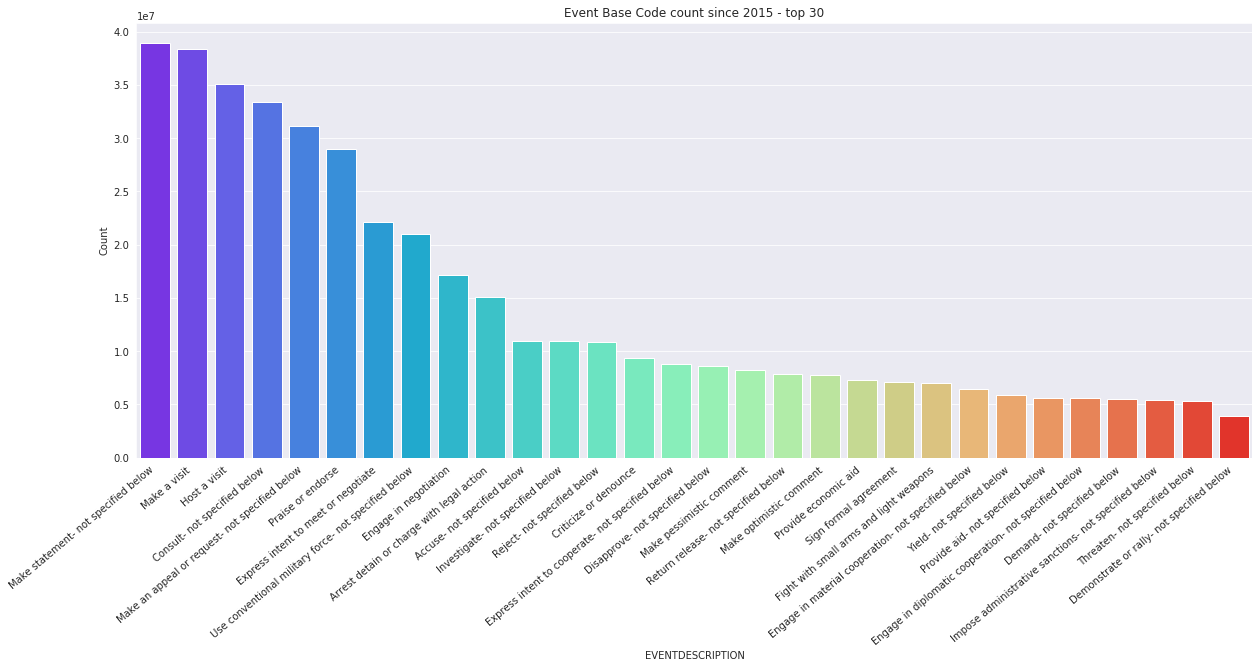

In [9]:
n = 30
s = GLyearEBC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(n)
g = sns.barplot(s.EVENTDESCRIPTION, s.Count, palette='rainbow')
g.set_title("Event Base Code count since 2015 - top {}".format(n))
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/GLOBAL/EBC.png', bbox_inches='tight')

In [10]:
s

,EVENTDESCRIPTION,Year,Count
96,Make statement- not specified below,12105,38898719
91,Make a visit,12105,38394813
80,Host a visit,12105,35123645
24,Consult- not specified below,12105,33412680
92,Make an appeal or request- not specified below,12105,31126246
104,Praise or endorse,12105,28991599
67,Express intent to meet or negotiate,12105,22094346
138,Use conventional military force- not specified...,12105,20976938
55,Engage in negotiation,12105,17121055
14,Arrest detain or charge with legal action,12105,15060022


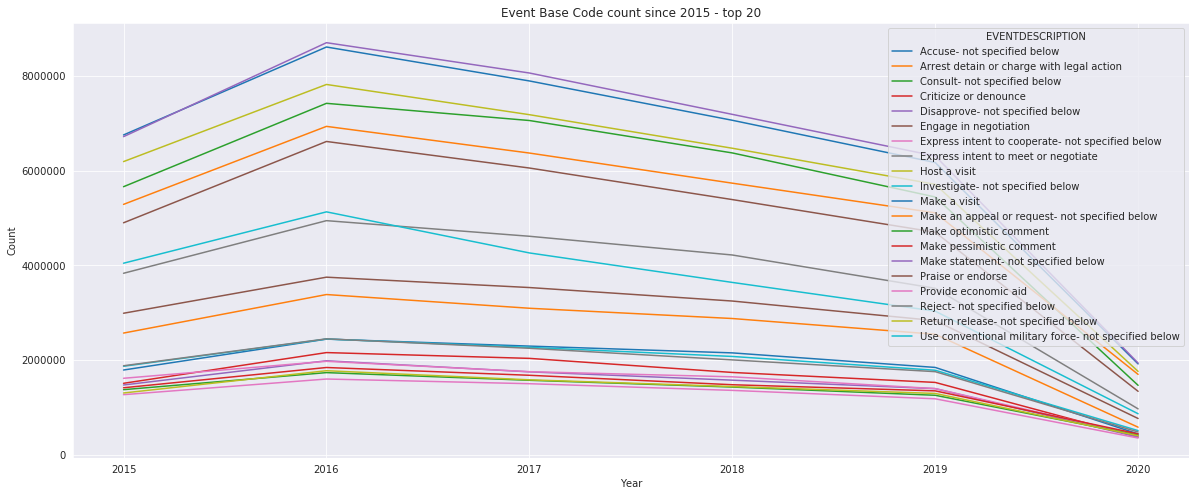

In [11]:
n=20
cols = GLyearEBC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(n)['EVENTDESCRIPTION']
s  = GLyearEBC.loc[GLyearEBC["EVENTDESCRIPTION"].isin(cols)]

s = s.groupby(["Year","EVENTDESCRIPTION"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Event Base Code count since 2015 - top {}".format(n))
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/GLOBAL/EBCtime.png', bbox_inches='tight')


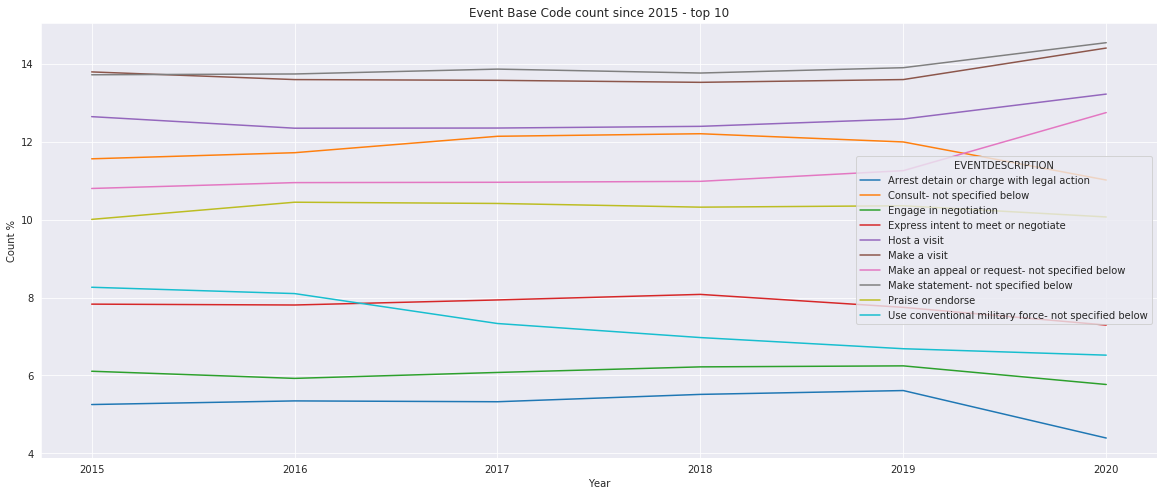

In [35]:
n=10
cols = GLyearEBC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(n)['EVENTDESCRIPTION']
s  = GLyearEBC.loc[GLyearEBC["EVENTDESCRIPTION"].isin(cols)]

s = s.groupby(["Year","EVENTDESCRIPTION"]).agg({'Count':'sum'}).sort_values(by=["Year", "Count"], ascending=False)

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Event Base Code count since 2015 - top {}".format(n))
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/GLOBAL/EBCperc.png', bbox_inches='tight')

In [36]:
s

Count          %
Year EVENTDESCRIPTION                                                      
2020 Make statement- not specified below                 1938859  14.545592
     Make a visit                                        1920496  14.407830
     Host a visit                                        1762899  13.225515
     Make an appeal or request- not specified below      1699660  12.751087
     Consult- not specified below                        1468738  11.018678
     Praise or endorse                                   1342368  10.070633
     Express intent to meet or negotiate                  972384   7.294961
     Use conventional military force- not specified ...   869401   6.522368
     Engage in negotiation                                769000   5.769146
     Arrest detain or charge with legal action            585725   4.394191
2019 Make statement- not specified below                 6306918  13.903421
     Make a visit                                        6168790  13.598922
     Host a visit                                        5708916  12.585143
     Consult- not specified below                        5441978  11.996686
     Make an appeal or request- not specified below      5107585  11.259526
     Praise or endorse                                   4698905  10.358602
     Express intent to meet or negotiate                 3515457   7.749725
     Use conventional military force- not specified ...  3033590   6.687463
     Engage in negotiation                               2833889   6.247228
     Arrest detain or charge with legal action           2546317   5.613283
2018 Make statement- not specified below                 7184681  13.766542
     Make a visit                                        7060013  13.527666
     Host a visit                                        6470187  12.397503
     Consult- not specified below                        6371201  12.207836
     Make an appeal or request- not specified below      5733193  10.985351
     Praise or endorse                                   5387233  10.322458
     Express intent to meet or negotiate                 4218174   8.082428
     Use conventional military force- not specified ...  3639637   6.973896
     Engage in negotiation                               3246937   6.221445
     Arrest detain or charge with legal action           2878182   5.514874
2017 Make statement- not specified below                 8057162  13.867276
     Make a visit                                        7889574  13.578838
     Host a visit                                        7177978  12.354102
     Consult- not specified below                        7054898  12.142268
     Make an appeal or request- not specified below      6368662  10.961179
     Praise or endorse                                   6052749  10.417457
     Express intent to meet or negotiate                 4613236   7.939895
     Use conventional military force- not specified ...  4261588   7.334669
     Engage in negotiation                               3531567   6.078221
     Arrest detain or charge with legal action           3094566   5.326094
2016 Make statement- not specified below                 8696590  13.742308
     Make a visit                                        8605435  13.598265
     Host a visit                                        7815335  12.349753
     Consult- not specified below                        7417232  11.720673
     Make an appeal or request- not specified below      6931177  10.952611
     Praise or endorse                                   6612713  10.449376
     Use conventional military force- not specified ...  5128057   8.103330
     Express intent to meet or negotiate                 4942492   7.810101
     Engage in negotiation                               3750198   5.926044
     Arrest detain or charge with legal action           3384101   5.347539
2015 Make a visit                                        6750505  13.795280
     Make statement- not specif